In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Titanic dataset
df = sns.load_dataset('titanic')

In [3]:
# Display first few rows
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [5]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [6]:
# Summary statistics
print(df.describe(include='all'))

          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  class  who adult_male deck  embark_town alive  \
count   8

* Only 38% survived, meaning most passengers did not survive.
* The average age of passengers is 29.7 years.
* The mean fare is 32.2, but it has a high standard deviation (meaning high variance).

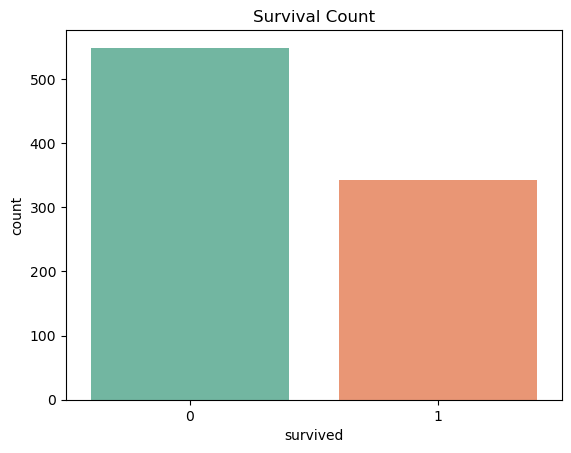

In [8]:
sns.countplot(x='survived', data=df, hue='survived', palette='Set2', legend=False)
plt.title("Survival Count")
plt.show()

More people died (0) than survived (1).

#### Survival Rate Based on Gender

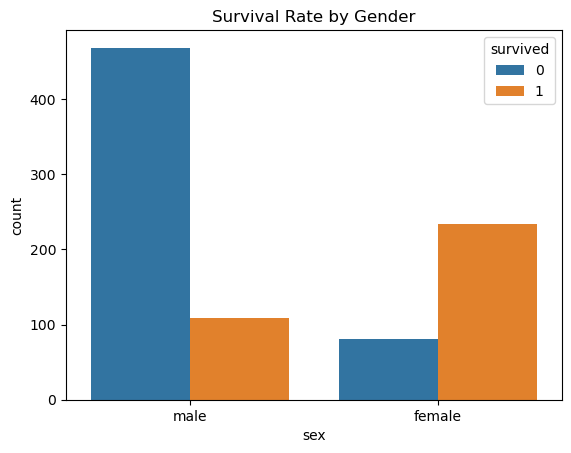

In [11]:
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()

Women had a higher survival rate than men.

#### Survival Rate by Class

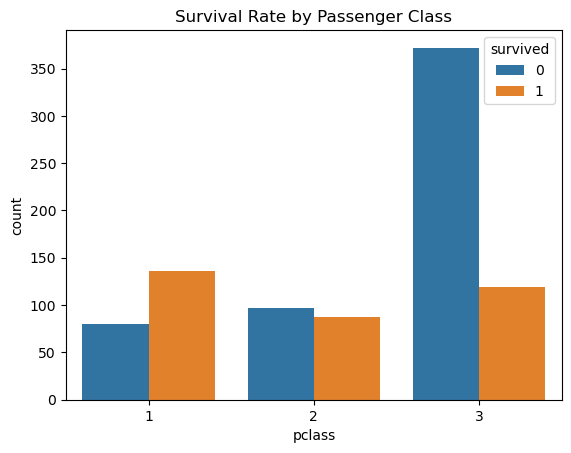

In [14]:
sns.countplot(x='pclass', hue='survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

* 1st class passengers survived more compared to 3rd class.
* Lower-class passengers had a higher mortality rate.
* This suggests wealthier passengers had better chances of survival.

#### Age Distribution

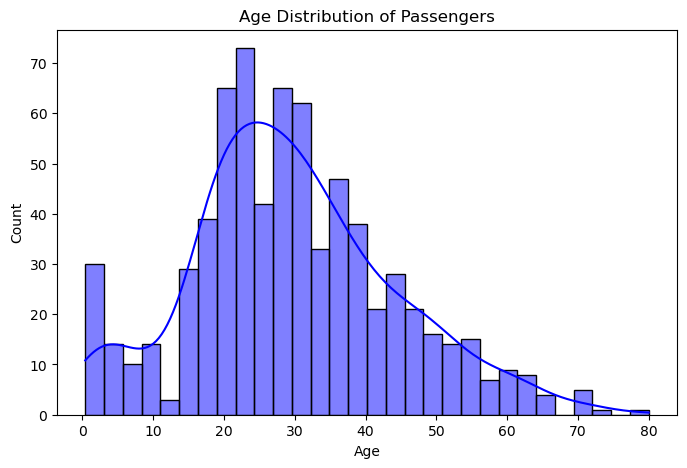

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.show()

* Most passengers were aged 20-40 years.
* Few children and elderly passengers were present.

#### Survival by Embarkation Port

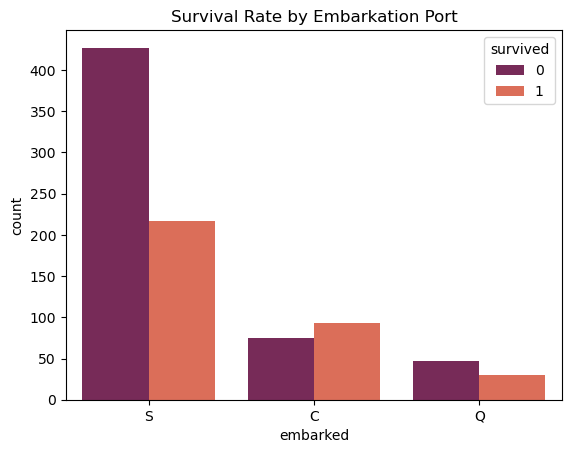

In [20]:
sns.countplot(x='embarked', hue='survived', data=df, palette='rocket')
plt.title("Survival Rate by Embarkation Port")
plt.show()

* Passengers who embarked from 'C' (Cherbourg) had higher survival rates.
* Those from 'S' (Southampton) had the lowest survival rate.

In [22]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:
# Dropping 'deck' column due to too many missing values
df.drop(columns=['deck'], inplace=True)

In [24]:
# Fill missing age values with median age
df['age'].fillna(df['age'].median(), inplace=True)

C:\Users\Venkatesh\AppData\Local\Temp\ipykernel_21636\2309101198.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


In [25]:
# Fill missing 'embarked' and 'embark_town' with the most frequent value (mode)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

C:\Users\Venkatesh\AppData\Local\Temp\ipykernel_21636\4140520468.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
C:\Users\Venkatesh\AppData\Local\Temp\ipykernel_21636\4140520468.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [26]:
# Encoding categorical variables
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df['embark_town'] = df['embark_town'].map({'Southampton': 0, 'Cherbourg': 1, 'Queenstown': 2})
df['who'] = df['who'].map({'man': 0, 'woman': 1})
df['class'] = df['class'].map({'Third': 0, 'First': 1, 'Second': 2})
df['alive'] = df['alive'].map({'no': 0, 'yes': 1})

In [27]:
# Display the transformed dataset
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,0,0,0.0,True,0,0,False
1,1,1,1,38.0,1,0,71.2833,1,1,1.0,False,1,1,False
2,1,3,1,26.0,0,0,7.9250,0,0,1.0,False,0,1,True
3,1,1,1,35.0,1,0,53.1000,0,1,1.0,False,0,1,False
4,0,3,0,35.0,0,0,8.0500,0,0,0.0,True,0,0,True


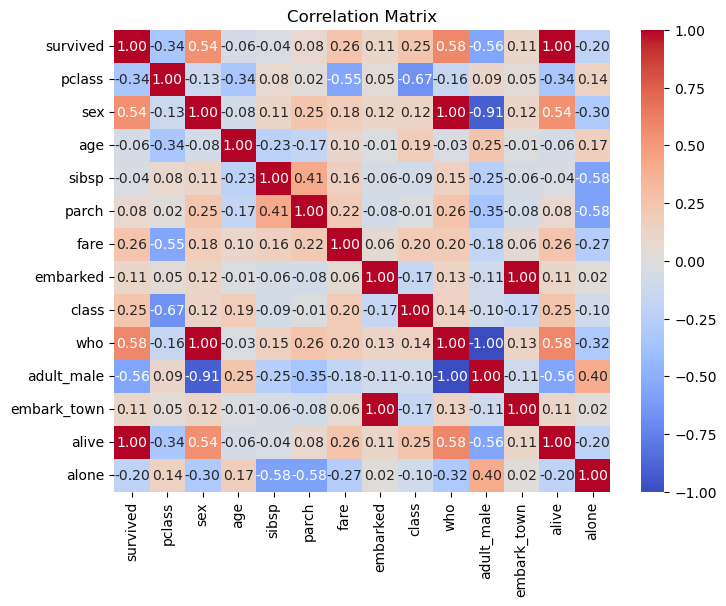

In [28]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

* pclass and survived: Negative correlation (-0.34). Lower passenger class (pclass = 3) is associated with lower survival rates.
* sex and survived: Strong positive correlation (0.54). Females had a higher chance of survival.
* fare and survived: Positive correlation (0.26). Higher fares seem to correlate with higher survival rates, likely because wealthier passengers were given priority.
* age and survived: Slight negative correlation (-0.06), indicating age does not have a strong direct effect on survival.

In [30]:
# Create a new feature 'family_size'
df['family_size'] = df['sibsp'] + df['parch'] + 1  # Including the passenger themselves

In [31]:
# Create a new feature 'is_alone'
df['is_alone'] = (df['family_size'] == 1).astype(int)

In [32]:
X = df.drop(columns=['survived', 'alive','who'])  # Drop target columns
y = df['survived']  # Target variable

In [33]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Define the model
model = LogisticRegression(max_iter=1000)

# Define RFE (recursive feature elimination)
selector = RFE(model, n_features_to_select=5)  # Select top 5 features

# Fit the RFE model
selector = selector.fit(X, y)

# Get the selected features
selected_features = X.columns[selector.support_]
print(f"Selected Features: {selected_features}")

Selected Features: Index(['pclass', 'adult_male', 'alone', 'family_size', 'is_alone'], dtype='object')


In [34]:
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the data
rf_model.fit(X, y)

# Get feature importance scores
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)

# Sort and display the most important features
sorted_feature_importance = feature_importance.sort_values(ascending=False)
print(f"Feature Importance:\n{sorted_feature_importance}")

Feature Importance:
fare           0.234203
age            0.227557
adult_male     0.172461
sex            0.127937
pclass         0.052880
class          0.048277
family_size    0.042147
sibsp          0.025278
parch          0.017877
embark_town    0.017777
embarked       0.017267
is_alone       0.009254
alone          0.007084
dtype: float64


We can focus on features like sex, pclass, age, fare, and embarked as the most important predictors of survival.

In [36]:
# Features and target
X = df[['sex', 'pclass', 'age', 'fare', 'embarked']]  # Selected features
y = df['survived']  # Target variable

In [37]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.78

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80       105
           1       0.71      0.77      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179



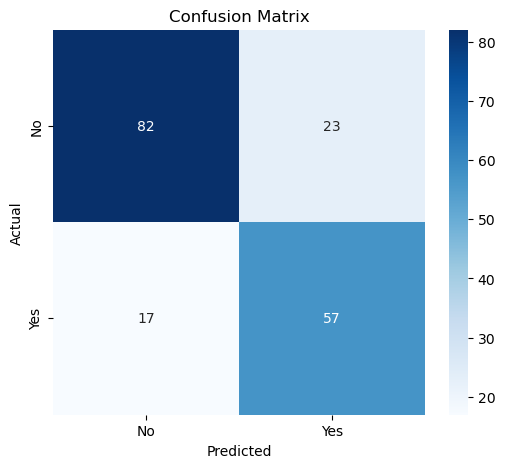

In [40]:
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

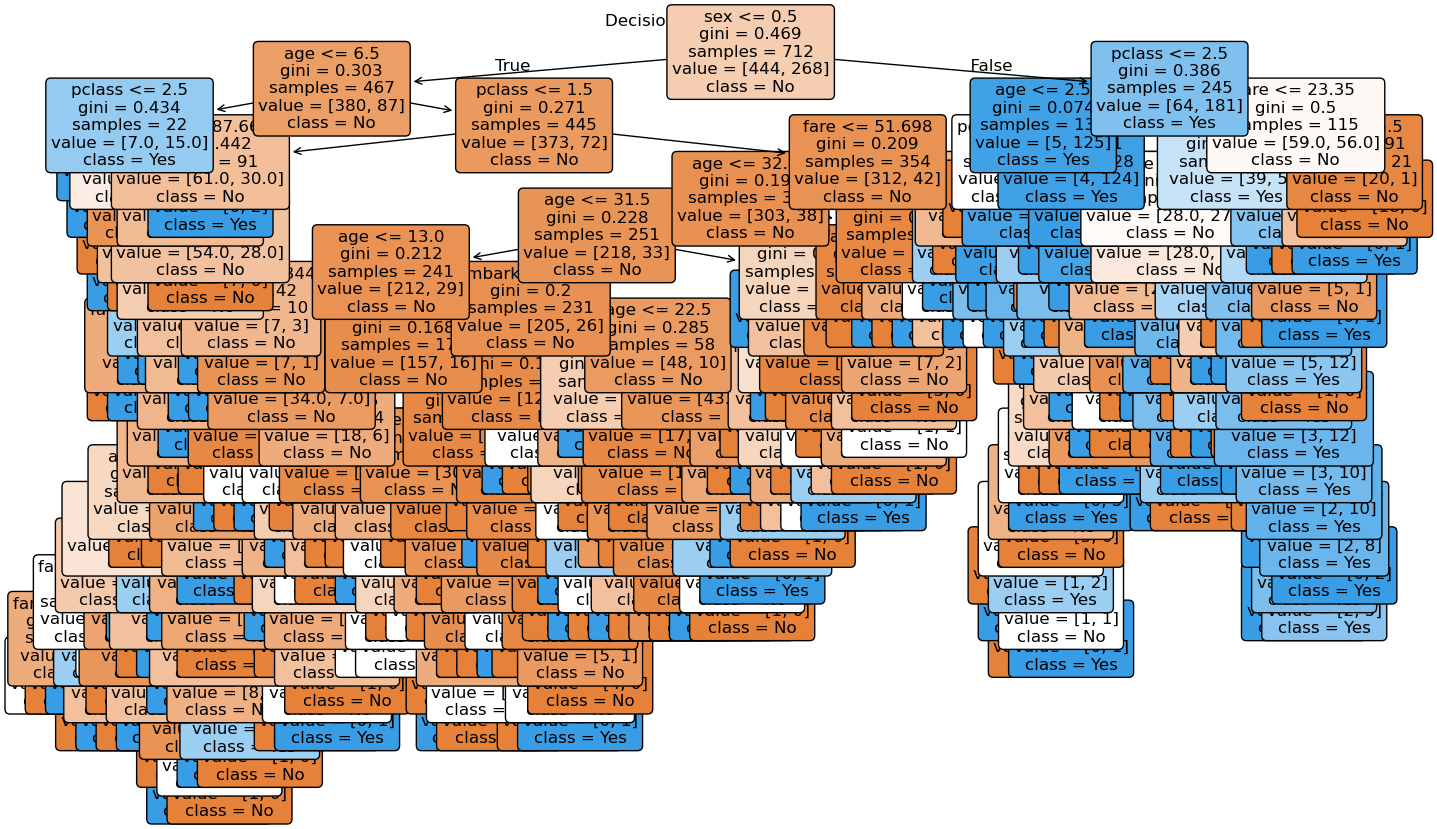

In [41]:
from sklearn.tree import plot_tree

# Plot the Decision Tree
plt.figure(figsize=(17, 10))
plot_tree(model, feature_names=X.columns, class_names=["No", "Yes"], filled=True, rounded=True, fontsize=12)
plt.title("Decision Tree Visualization")
plt.show()

In [42]:
import sys
sys.path.append("C:\\Users\\Venkatesh\\Documents\\Jayashree\\regressor\\Lib\\site-packages")

from sklearn.tree import export_graphviz
import graphviz


# Export the decision tree as a .dot file
dot_data = export_graphviz(
    model, out_file=None, 
    feature_names=selected_features, 
    filled=True, rounded=True, special_characters=True
)

# Generate the graph
graph = graphviz.Source(dot_data)

# Display the tree
graph.render("decision_tree", format="png", view=True)

'decision_tree.png'

In [43]:
from sklearn.model_selection import GridSearchCV

dt_model = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=1)

In [44]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [45]:
print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Cross-Validation Score: 0.8174


In [46]:
# Use the best parameters to train the final model
best_dt_model = grid_search.best_estimator_

# Train the final model
best_dt_model.fit(X_train, y_train)
y_pred_best = best_dt_model.predict(X_test)

In [47]:
# Evaluate the optimized model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Optimized Accuracy: {accuracy_best:.2f}")
print("\nOptimized Classification Report:\n", classification_report(y_test, y_pred_best))

Optimized Accuracy: 0.80

Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



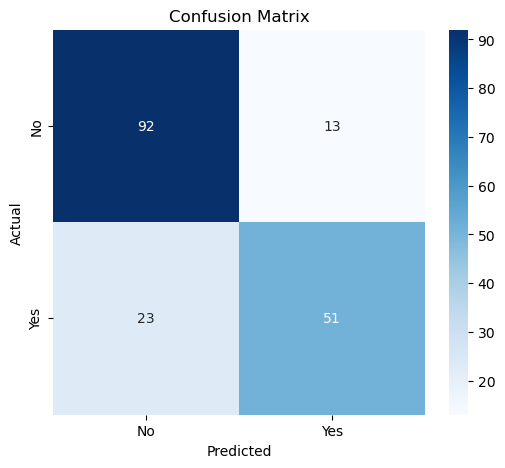

In [48]:
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()